In [25]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os

def func_(x, a, b, c):
    return a * np.log(b * x) + c

def func2_(x, a, b, c):
    return a * np.exp(b * x) + c

fname = os.path.join(os.getcwd(), "zol15.txt")

data = np.genfromtxt(fname, delimiter=";")
x = data[:,0]
y = data[:,2]

a = data[:,1]

def plot_(x1, y1, x2, y2, x3, y3, popt):
    plt.plot(x1, y1, '.', label = "data")
    plt.plot(x2, y2, label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.plot(x3, y3, 'x', label = "beta")
    plt.legend()
    plt.show()


scale = np.array([0.83, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])[::-1]
beta = np.array([0.58,0.7,1.4,2.1,2.8,3.5,4.2,4.9,5.6,6.3,7])[::-1]
fov = np.array([13.79,11.43,5.71,3.81,2.86,2.29,1.90,1.63,1.43,1.27,1.14])[::-1]

dbeta = beta[0] - beta[-1]
dx = x[0] - x[-1]

C:\Users\Aramco\AppData\Local\Temp\ipykernel_16084\2453380967.py:7: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


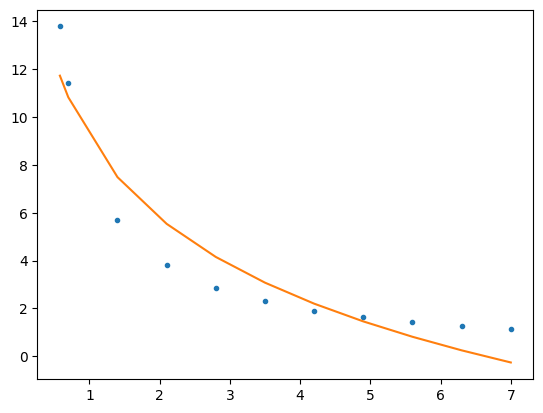

array([-4.81597984,  0.19636101,  1.26981936])

In [42]:

x_ = beta
y_ = fov

popt, pcov = curve_fit(func_, x_, y_, p0=(1, .1, 1))
perr = np.sqrt(np.diag(pcov))

xs = beta
ys = func_(xs, *popt)

plt.plot(beta, fov, ".")
plt.plot(beta, ys, "-")
plt.show()

popt

[-2.12710188e+04  1.16168806e+00  4.41241705e+04]


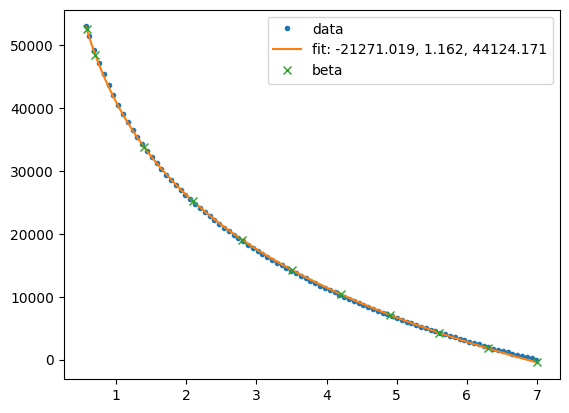

In [127]:
f = dbeta/dx

ymin = y.min()

xf = x * f
yf = y + abs(ymin)

popt, pcov = curve_fit(func_, xf, yf, p0=(2e4, .1, 1))
perr = np.sqrt(np.diag(pcov))

xs = beta
ys = func_(xs, *popt)

print (popt)

x2, y2 = xf, func_(xf, *popt)

plot_(xf, yf, x2, y2, xs, ys, popt)

[-5.60309272e+04  2.14169574e-01  6.53730587e+04]


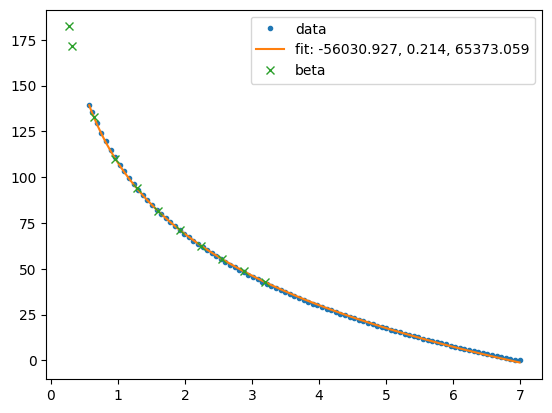

In [139]:

f = dbeta/dx

amin = a.min()

xf = x # * f
yf = (a + abs(amin)) * 1e3

popt, pcov = curve_fit(func_, xf, af, p0=(2e4, .1, 1))

xs = beta
ys = func_(xs, *popt)

print (popt)

x2, y2 = xf, func_(xf, *popt)

plot_(xf * f, yf/1e3, x2 * f, y2/1e3, xs * f, ys/1e3, popt)